In [1]:
#Classifier problem - import all classifiers to see accuracy score for best model

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import itertools

path = r"C:\Users\hemak\OneDrive\문서\Hema - Projects - Data Science\Diabetes Project\diabetes.csv"
db = pd.read_csv(path)

In [27]:
db.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
db.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [29]:
db.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [30]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
db.shape

(768, 9)

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


<function matplotlib.pyplot.show(close=None, block=None)>

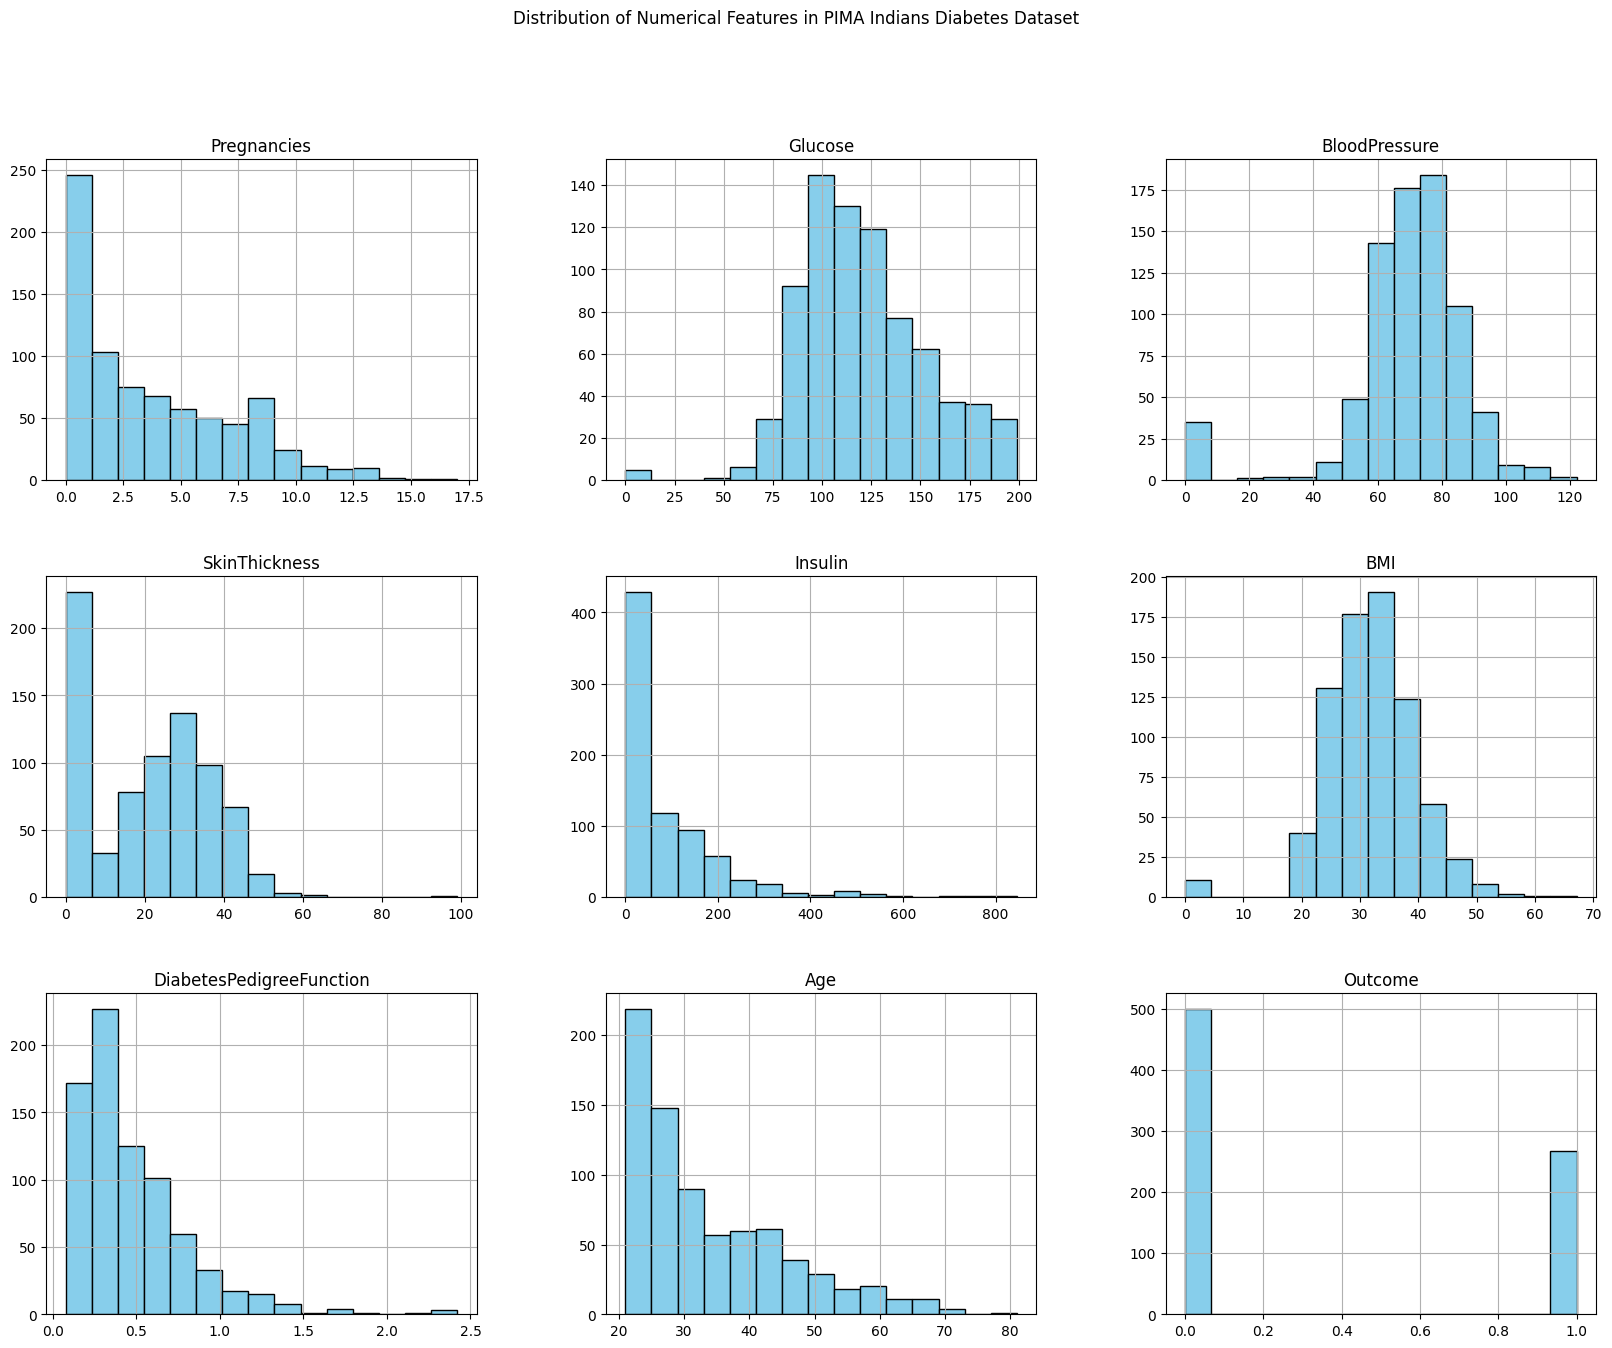

In [33]:
db.hist(bins=15, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features in PIMA Indians Diabetes Dataset')
plt.show

In [34]:
#calculate mean to replace null values
meanst = db.SkinThickness.mean()
meanins = db.Insulin.mean()
meangl = db.Glucose.mean()
meanbp = db.BloodPressure.mean()
meanbmi = db.BMI.mean()
print(meanst, meanins, meangl, meanbp, meanbmi)

20.536458333333332 79.79947916666667 120.89453125 69.10546875 31.992578124999998


In [35]:
#replace zeros with mean value in features
db['BMI'].replace(0.0, meanbmi, inplace=True)
db['BMI'] = round(db['BMI'], 1)
db['SkinThickness'].replace(0, meanst, inplace=True)
db['SkinThickness'] = db['SkinThickness'].astype(int)
db['Insulin'].replace(0, meanins, inplace=True)
db['Insulin'] = db['Insulin'].astype(int)
db['BloodPressure'].replace(0, meanbp, inplace=True)
db['BloodPressure'] = db['BloodPressure'].astype(int)
db['Glucose'].replace(0, meangl, inplace=True)
db['Glucose'] = db['Glucose'].astype(int)
db.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,20,79,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,20,79,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,20,79,32.0,0.232,54,1


In [36]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

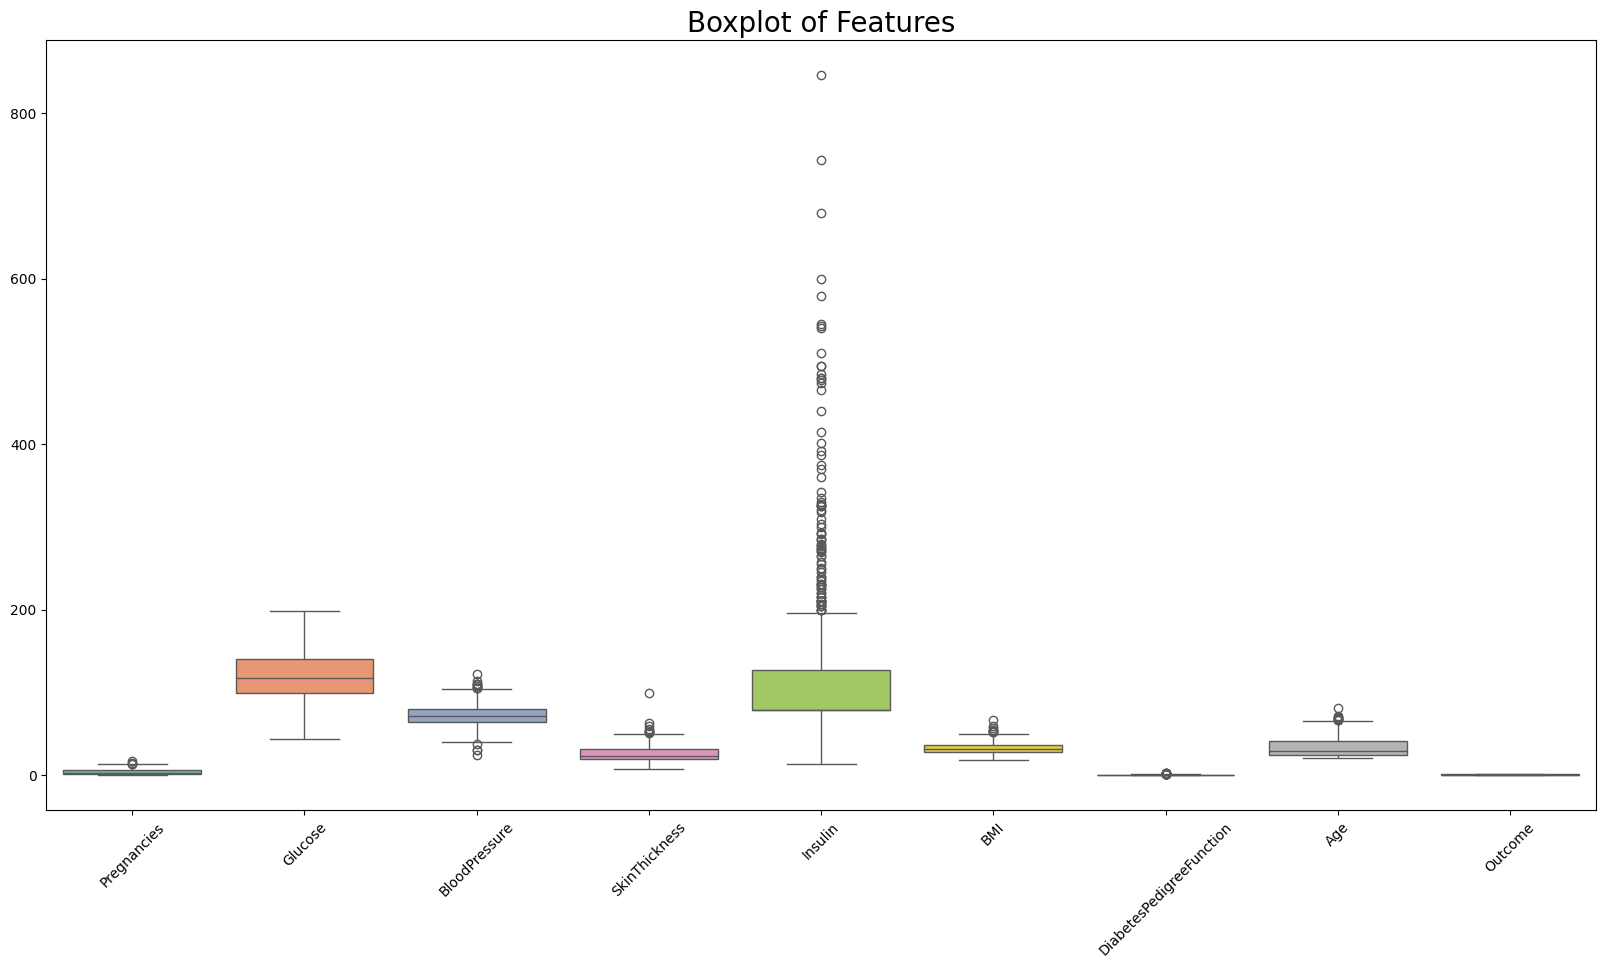

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=db, palette='Set2')
plt.title('Boxplot of Features', fontsize=20)
plt.xticks(rotation=45)
plt.show()

<Axes: >

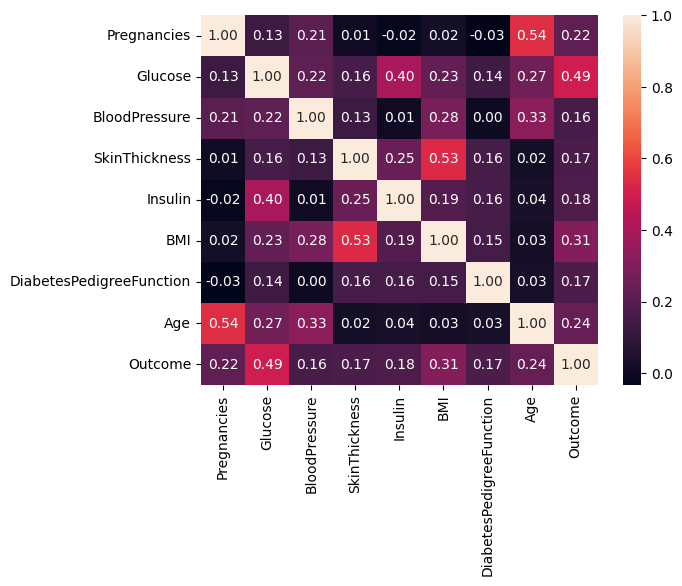

In [38]:
corrd = db.corr()
sns.heatmap(corrd, annot=True, fmt='.2f')

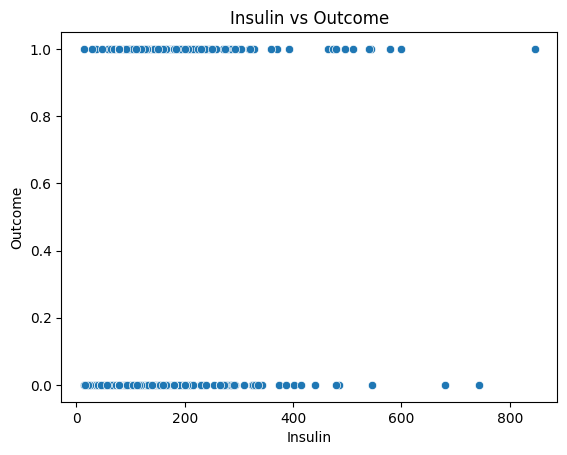

In [39]:
#relationship between insulin vs outcome
sns.scatterplot(data=db, x='Insulin', y='Outcome')
plt.title('Insulin vs Outcome')
plt.show()

In [40]:
#Data scaling for model building
X = db.drop(['Outcome'], axis=1)
y = db['Outcome']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = scaled_data
X

array([[ 0.63994726,  0.86546051, -0.02064527, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.2057885 , -0.51613175, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0161544 , -0.68129391, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02221764, -0.02064527, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1421672 , -1.01161824, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94277275, -0.18580743, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
test_size = 0.2
print(f'The test size of this dataset is {test_size}')

The test size of this dataset is 0.2


In [42]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [43]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB()
    
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

print('All models trained successfully!')

All models trained successfully!


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = []
for name, y_pred in results.items():
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                  KNN  0.766234   0.661017  0.709091  0.684211  0.753535
1                  SVM  0.733766   0.645833  0.563636  0.601942  0.695960
2        Decision Tree  0.720779   0.588235  0.727273  0.650407  0.722222
3        Random Forest  0.759740   0.645161  0.727273  0.683761  0.752525
4    Gradient Boosting  0.746753   0.625000  0.727273  0.672269  0.742424
5  Logistic Regression  0.766234   0.686275  0.636364  0.660377  0.737374
6             AdaBoost  0.753247   0.644068  0.690909  0.666667  0.739394
7          Naive Bayes  0.753247   0.644068  0.690909  0.666667  0.739394


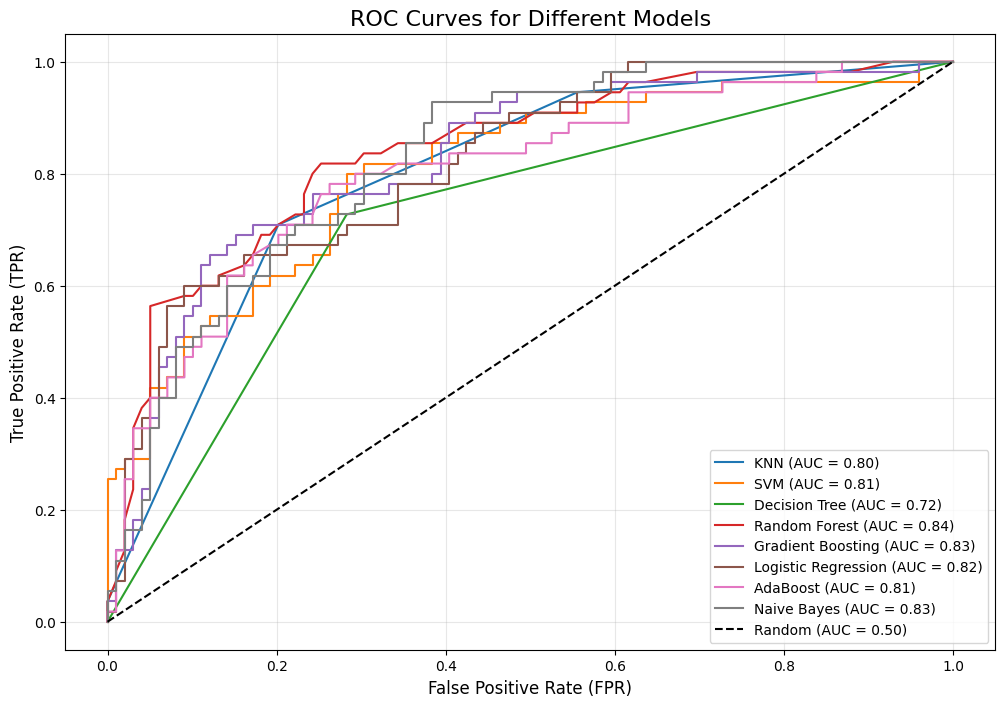

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

for name, model in models.items():

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")

plt.title("ROC Curves for Different Models", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = []

for name, model in models.items():
   
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = model.decision_function(X_train)
        y_test_prob = model.decision_function(X_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = {
        "Model": name,
        "Dataset": "Train",
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1 Score": f1_score(y_train, y_train_pred),
        "ROC AUC": roc_auc_score(y_train, y_train_prob),
    }

    test_metrics = {
        "Model": name,
        "Dataset": "Test",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "ROC AUC": roc_auc_score(y_test, y_test_prob),
    }

    metrics.extend([train_metrics, test_metrics])

metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,Dataset,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,KNN,Train,0.833876,0.796791,0.699531,0.745000,0.900015
1,KNN,Test,0.766234,0.661017,0.709091,0.684211,0.800000
2,SVM,Train,0.824104,0.807018,0.647887,0.718750,0.905518
3,SVM,Test,0.733766,0.645833,0.563636,0.601942,0.805877
4,Decision Tree,Train,1.000000,1.000000,1.000000,1.000000,1.000000
5,Decision Tree,Test,0.720779,0.588235,0.727273,0.650407,0.722222
6,Random Forest,Train,1.000000,1.000000,1.000000,1.000000,1.000000
7,Random Forest,Test,0.759740,0.645161,0.727273,0.683761,0.840588
8,Gradient Boosting,Train,0.929967,0.938144,0.854460,0.894349,0.982696
9,Gradient Boosting,Test,0.746753,0.625000,0.727273,0.672269,0.826814


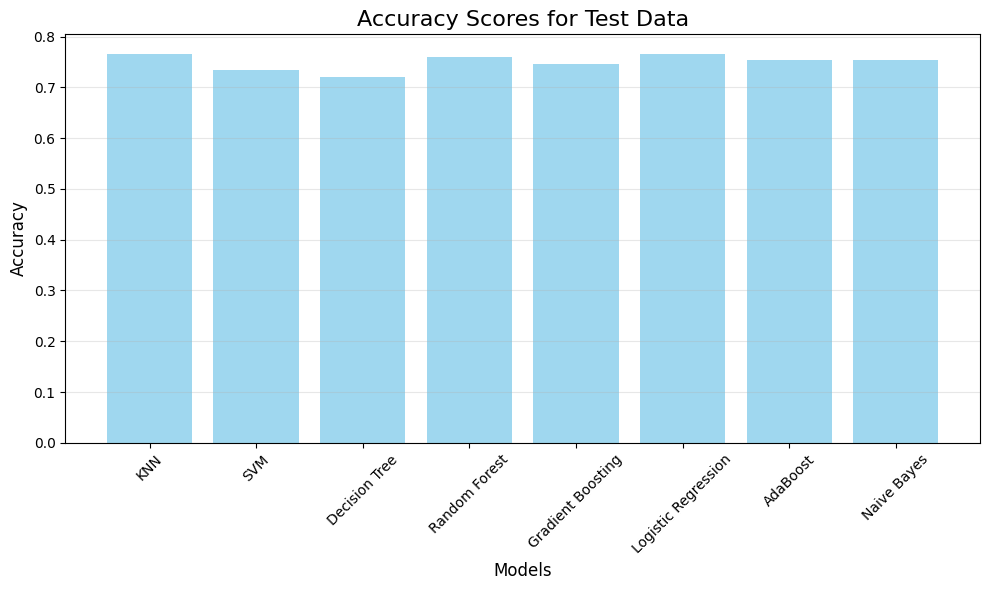

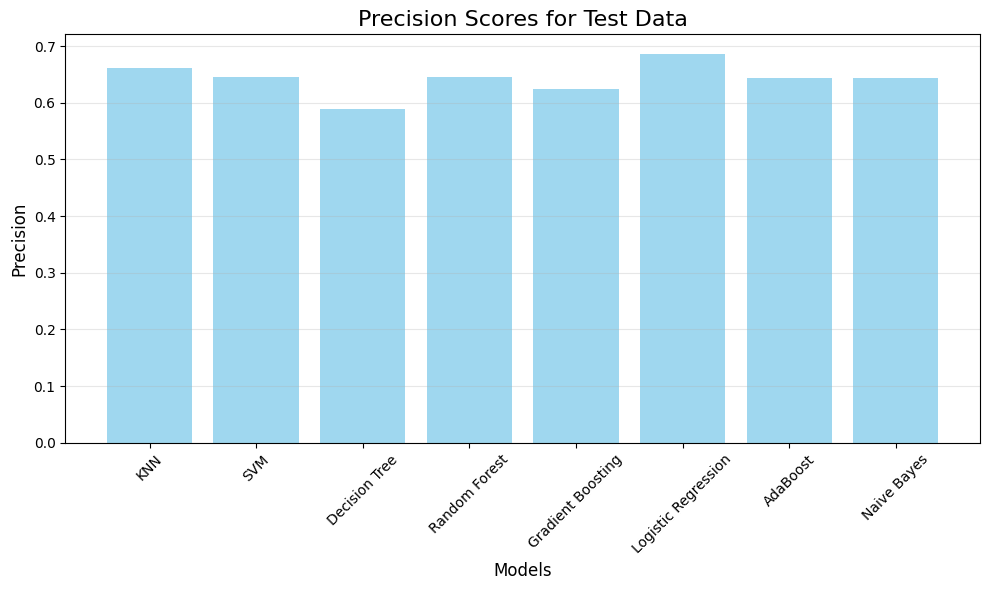

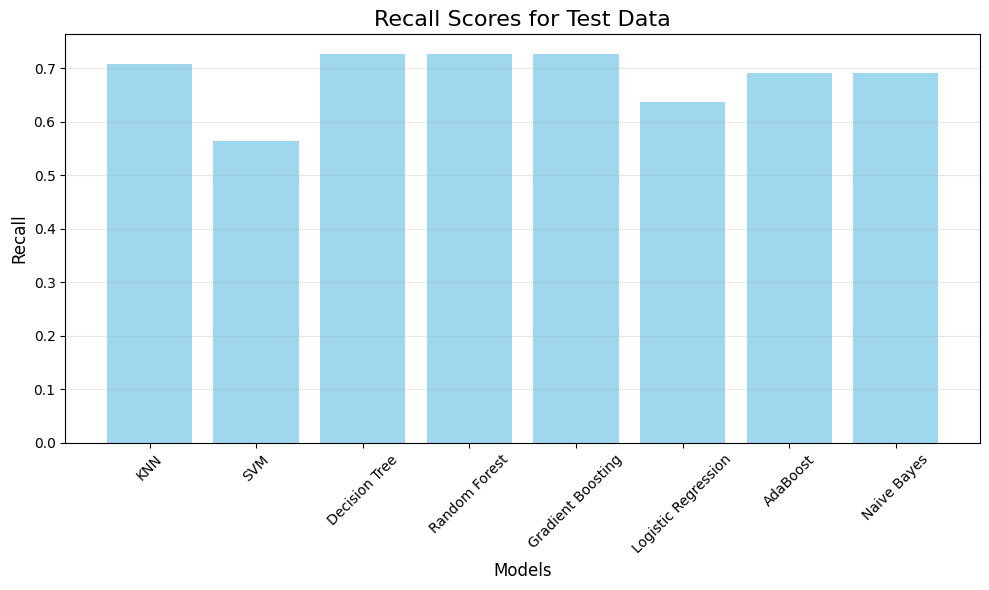

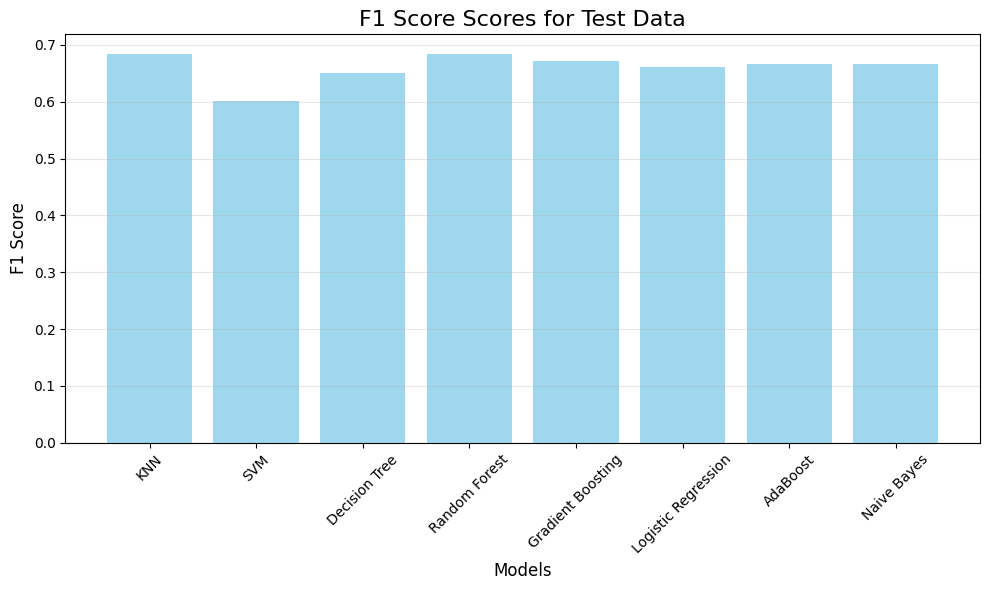

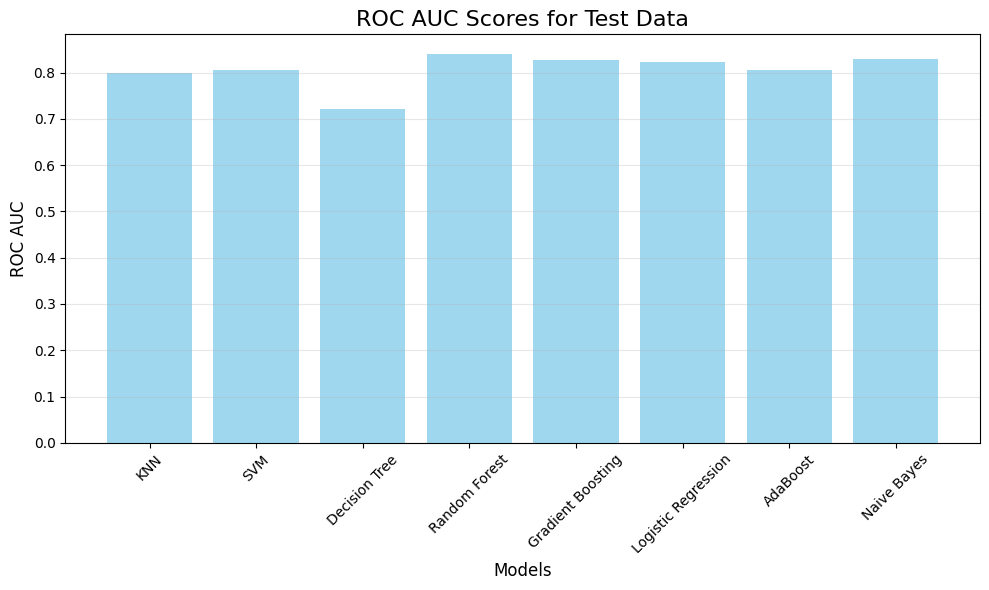

In [47]:

test_metrics = metrics_df[metrics_df['Dataset'] == 'Test']

metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(test_metrics["Model"], test_metrics[metric], color='skyblue', alpha=0.8)
    plt.title(f"{metric} Scores for Test Data", fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

We chose Random Forest model as the train and test data has the highest accuracies compared to other models.  

Best parameters: {'n_estimators': 175}
Best scores: 0.7769


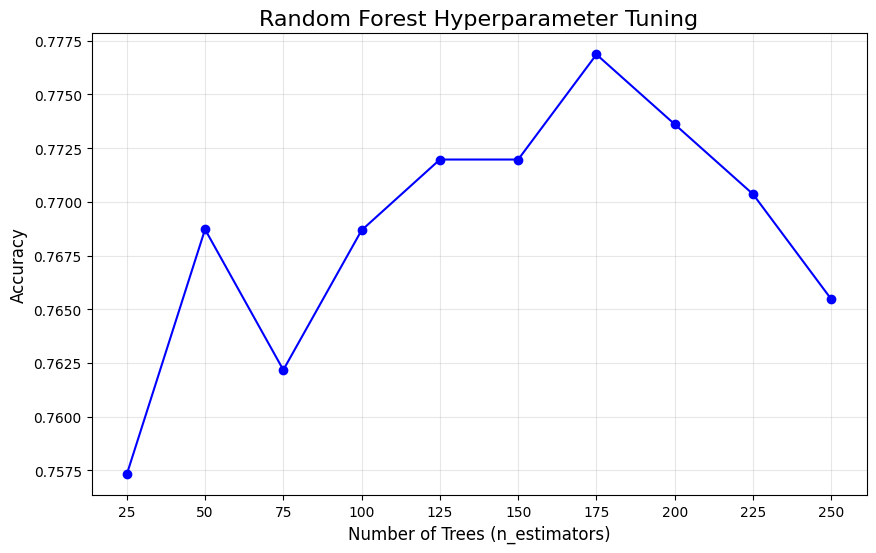

In [49]:

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

param_grid = {'n_estimators': range(25, 251, 25)}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best scores: {best_score:.4f}")

results = grid_search.cv_results_

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('Random Forest Hyperparameter Tuning', fontsize=16)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(param_grid['n_estimators'])
plt.show()

It was found that Random Forest Model gave the highest accuracy in this project at 78%.
